In [ ]:
import string
import pandas as pd
import secrets
pd.set_option('display.max_rows', 100)

# **Exclusive Or (XOR)**

**Exclusive or (more commonly referred to as XOR) is a bitwise operation. A bitwise XOR operation results in a 1 only if the input bits are different, else it results in a 0.**

<sup>Source: [Bitwise Operators](https://www.arduino.cc/reference/tr/language/structure/bitwise-operators/bitwisexor/) from Arduino.com</sup>

**<center>XOR Truth Table<center/>**

| $x_1$ Input  | $x_2$ Input  | XOR Ouptut  |
|---|---|---|
| **0**  | **0**  | **0**  |
| **0**  | **1**  | **1**  |
| **1**  |  **0** | **1**  |
| **1**  | **1**  | **0**  |

In [ ]:
for i in range(2):
  for j in range(2):
    print(i, j, i ^ j)

0 0 0
0 1 1
1 0 1
1 1 0


## **XOR is an involution (Bijection)**

In [ ]:
num_1 = 22
num_2 = 7

print((num_1 ^ num_2) == (num_2 ^ num_1))

xor_num = num_1 ^ num_2

print(f'The XOR of the two numbers is: {xor_num}')
print(xor_num ^ num_1)
print(xor_num ^ num_2)

True
The XOR of the two numbers is: 17
7
22


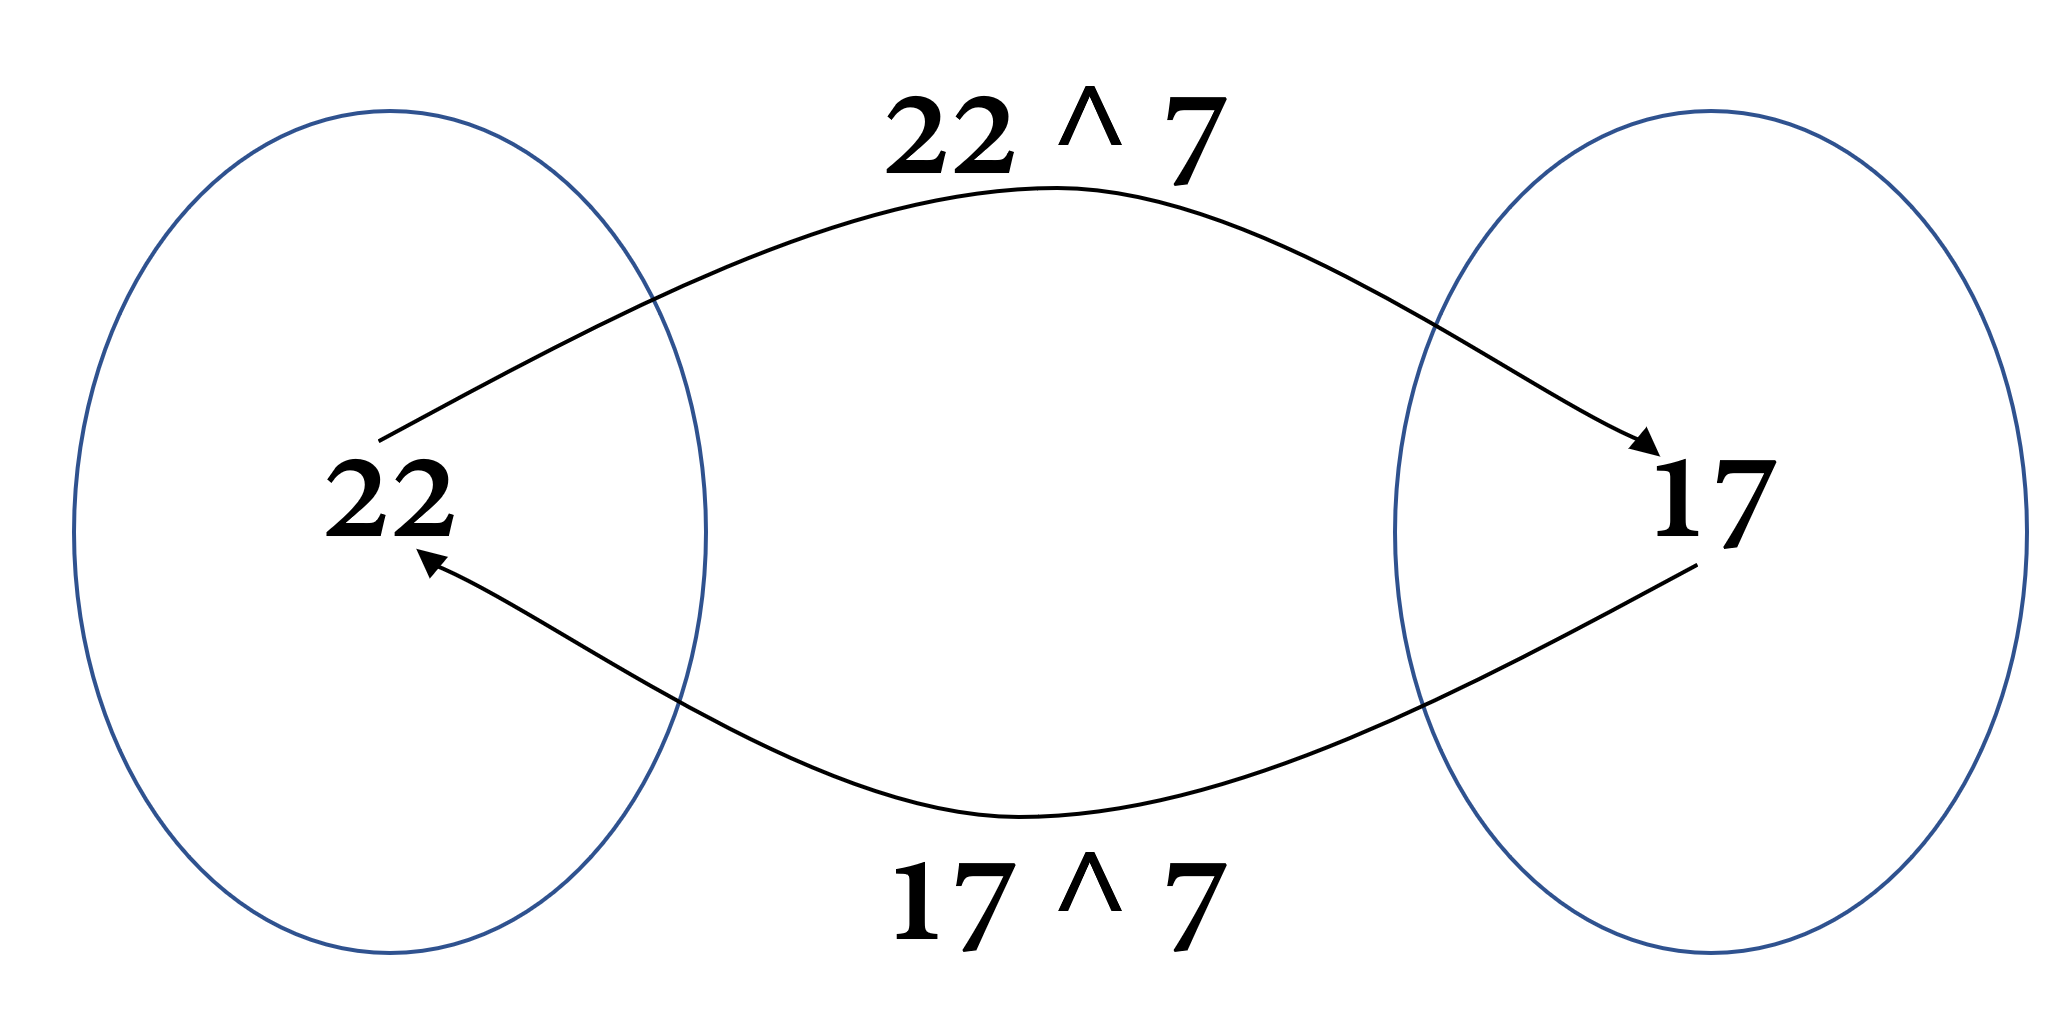

# **ASCII and XOR**

**The American Standard Code for Information Interchange (ASCII), is a character encoding standard for electronic communication. There are 128 unique characters within ASCII.**

In [ ]:
full_ascii = [char for char in ''.join(chr(i) for i in range(128))]
full_ascii

['\x00',
 '\x01',
 '\x02',
 '\x03',
 '\x04',
 '\x05',
 '\x06',
 '\x07',
 '\x08',
 '\t',
 '\n',
 '\x0b',
 '\x0c',
 '\r',
 '\x0e',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x14',
 '\x15',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1a',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 '\x1f',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f']

In [ ]:
#not all the characters are printable
print(full_ascii[0])

 


In [ ]:
data = {'String': [char for char in string.printable],
 'Unicode Values': [ord(char) for char in string.printable],
 'Binary Values': [bin(ord(char)) for char in string.printable]}

df = pd.DataFrame.from_dict(data)
df.set_index('String', inplace = True)
df[:15]

,Unicode Values,Binary Values
String,,
0,48,0b110000
1,49,0b110001
2,50,0b110010
3,51,0b110011
4,52,0b110100
5,53,0b110101
6,54,0b110110
7,55,0b110111
8,56,0b111000


## **XORing with the ordinal function**

In [ ]:
int1, int2 = ord('e'), ord('0')
xor = int1 ^ int2
xor.to_bytes((xor.bit_length() + 7) // 8, 'big').decode()

'U'

In [ ]:
int1, int2 = ord('e'), ord('0')
xor = int1 ^ int2

In [ ]:
(xor.bit_length() + 7) // 8

1

In [ ]:
xor.to_bytes((xor.bit_length() + 7) // 8, 'big')

b'U'

## **XORing given binary str values**

In [ ]:
binary1 = '01000001'
binary2 = '00110001'
bit_str = ''.join([str(int(let1)^int(let2)) for let1,let2 in zip(binary2, binary1)])
chr(int(bit_str,2))

'p'

In [ ]:
chr(int('01000001',2))

'A'

In [ ]:
chr(int('00110001',2))

'1'

# **Simple XOR Encryption and Decryption**

In [ ]:
def xor_encrypt(message):
  num_list = [ord(char) for char in message]
  key = secrets.choice(range(128))
  encrypted_list = [num ^ key for num in num_list]
  return [''.join([num.to_bytes((num.bit_length() + 7) // 8, 'big').decode() for num in encrypted_list]), key]

In [ ]:
encrypt_list = xor_encrypt('Hello World!')
cipher_text = encrypt_list[0]
key = encrypt_list[1]

In [ ]:
cipher_text

'\t$--.a\x16.3-%`'

In [ ]:
def xor_decrypt(cipher_text, key):
  num_list = [ord(char) ^ key for char in cipher_text]
  return ''.join([num.to_bytes((num.bit_length() + 7) // 8, 'big').decode() for num in num_list])

In [ ]:
xor_decrypt(cipher_text, key)

'Hello World!'

# **XOR in Cryptography**

**As we saw earlier, because the XOR operation is bijective, it is invertible. This means that it is easy to conduct an XOR operation on a sequence of bits and it is easy to reverse the operation. Because of this, it is a useful tool for encryption and decryption. 3DES, Blowfish, AES and Serpent are just a few examples of algorithms that utilize the XOR operation.**

**XOR can also be used for pseudo-random number generation. Linear-feedback shift registers rely on the XOR operation as part of the process to generate psuedo-random numbers.**

# **References and Additional Learning**

## **Online Courses**

- **[Master Modern Security and Cryptography by Coding in Python](https://www.udemy.com/course/learn-modern-security-and-cryptography-by-coding-in-python/), Udemy course by Rune Thomsen**

- **[Cryptography I](https://www.coursera.org/learn/crypto) Stanford Course by Dan Boneh**

- **[Cryptography](https://www.khanacademy.org/computing/computer-science/cryptography), Khan Academy Course Unit**

## **Textbooks**
- **[Implementing Cryptography Using Python](https://www.amazon.com/Implementing-Cryptography-Using-Python-Shannon/dp/1119612209/ref=sr_1_1?dchild=1&keywords=Implementing+Cryptography+Using+Python&qid=1609360861&s=books&sr=1-1) by Shannon Bray**
- **[Practical Cryptography in Python: Learning Correct Cryptography by Example](https://www.amazon.com/Practical-Cryptography-Python-Learning-Correct/dp/1484248996/ref=sr_1_1?crid=1GKREMIFL2A0Y&dchild=1&keywords=practical+cryptography+in+python&qid=1609360771&s=books&sprefix=Practical+Cryptography+in+Python%2Cstripbooks%2C134&sr=1-1) by  Seth James Nielson and Christopher Monson**
- **[Black Hat Python](https://www.amazon.com/Black-Hat-Python-Programming-Pentesters/dp/1593275900) by Justin Seitz**

## **Videos**

- **[XOR & the Half Adder](https://www.youtube.com/watch?v=VPw9vPN-3ac) from Computerphile**

## **Websites**
- **[Bitwise Operators](https://www.arduino.cc/reference/tr/language/structure/bitwise-operators/bitwisexor/) from Arduino.com**

- **[Bitwise Operators in Python](https://realpython.com/python-bitwise-operators/) by Bartosz Zaczyński**

- **[ASCII Table](https://www.sciencebuddies.org/science-fair-projects/references/ascii-table) from Science Buddies**

# **Connect**

- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG) and [GitHub](https://github.com/ad17171717). Happy coding!**